# 1. Artificial Neural Network

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Import the MNIST dataset

This guide uses the MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show numbers from 0 to 9 at low resolution (28 by 28 pixels)

In [3]:
import tensorflow as tf
from tensorflow import keras

mnist = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1177s 102us/step


In [16]:
(X_train, y_train), (X_test, y_test) = mnist

Loading the dataset returns four NumPy arrays:

- The `train_images` and `train_labels` arrays are the training set—the data the model uses to learn.
- The model is tested against the test set, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [17]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [18]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

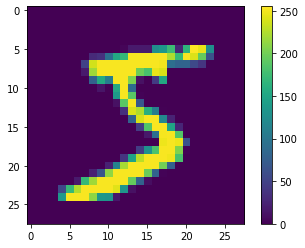

In [19]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

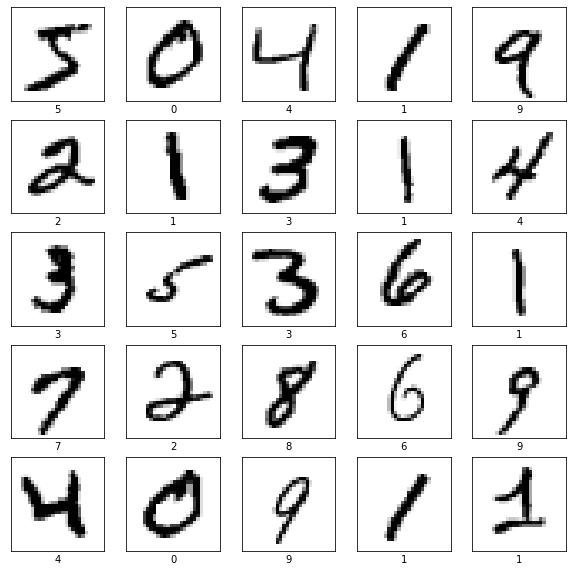

In [21]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.show()

## Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

## Set up the layers
The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.


Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam

model = Sequential([Flatten(input_shape=(28, 28)), 
                    Dense(128, activation='relu'), 
                    Dropout(0.2),
                    Dense(10, activation='softmax')])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
****

## Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
- *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [53]:
model.compile(optimizer=Adam(0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `X_train` and `y_train` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `X_test` array. Verify that the predictions match the labels from the `y_test` array.

To start training, call the `model.fit` method—so called because it "fits" the model to the training data:

In [54]:
r = model.fit(X_train, y_train, 
              validation_data=(X_test, y_test),
              epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.2930 - accuracy: 0.9144 - val_loss: 0.1296 - val_accuracy: 0.9616
Epoch 2/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.1406 - accuracy: 0.9588 - val_loss: 0.0968 - val_accuracy: 0.9702
Epoch 3/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.1062 - accuracy: 0.9685 - val_loss: 0.0861 - val_accuracy: 0.9725
Epoch 4/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.0854 - accuracy: 0.9734 - val_loss: 0.0779 - val_accuracy: 0.9763
Epoch 5/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0724 - accuracy: 0.9775 - val_loss: 0.0697 - val_accuracy: 0.9785
Epoch 6/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.0642 - accuracy: 0.9790 - val_loss: 0.0678 - val_accuracy: 0.9789
Epoch 7/10
60000/60000 [==============================] 

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.99 (or 99%) on the training data.

# Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [55]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


Test accuracy: 0.9800999760627747


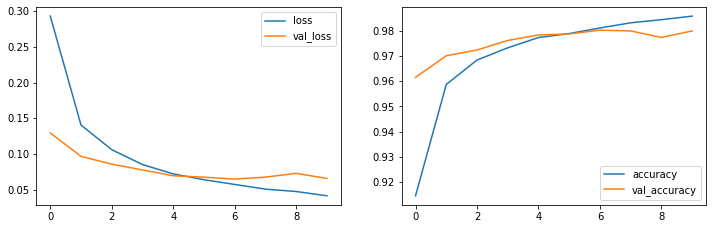

In [56]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

# Makes predictions

With the model trained, you can use it to make predictions about some images.

In [57]:
predictions = model.predict(test_images)
predictions[0]

array([3.4890750e-08, 4.1958494e-09, 9.5826942e-07, 9.1177953e-06,
       1.2542221e-12, 3.3277811e-08, 7.4520515e-14, 9.9998975e-01,
       8.6003302e-09, 1.5637217e-07], dtype=float32)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [58]:
np.argmax(predictions[0])

7

So, the model is most confident that the number on this image is a 7. Examining the test label shows that this classification is correct:

In [59]:
test_labels[0]

7

Graph this to look at the full set of 10 class predictions.

In [60]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} {100*np.max(predictions_array):2.0f}% ({true_label})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

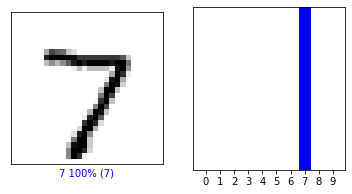

In [61]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

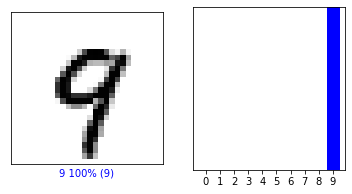

In [62]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

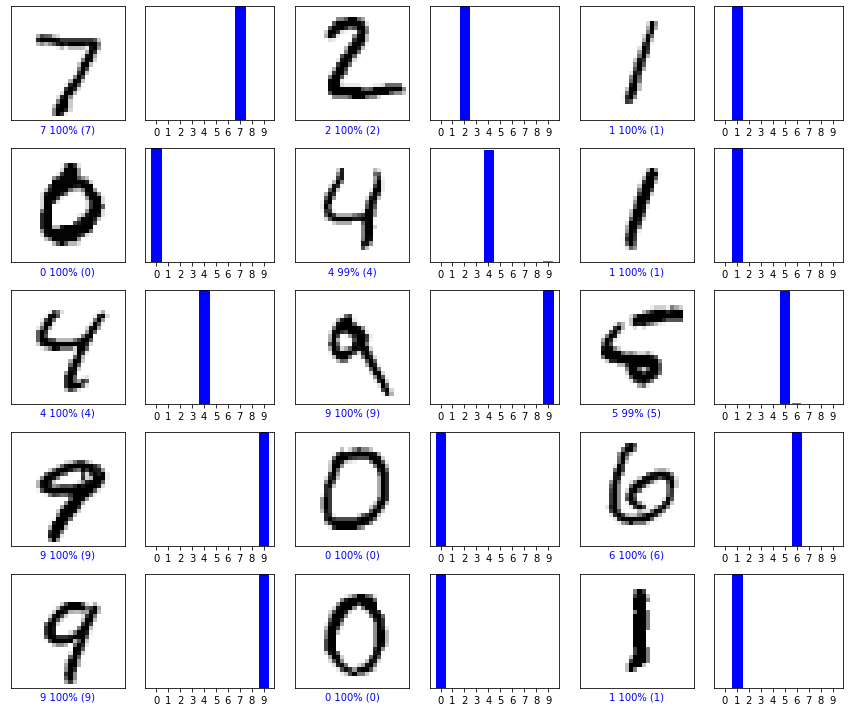

In [63]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 2. Convolutional Neural Networks (CNNs)

## Reshaping the data

In [64]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
from keras